# 로지스틱 회귀(Logistic Regression)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Sigmoid 함수

In [4]:
def sigmoid(x, a=1, b=0):
    return (1. / (1 + np.exp(-a*(x-b))))

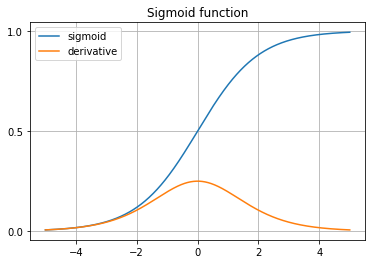

In [7]:
xs = np.linspace(-5,5,1001)
ys = sigmoid(xs)
plt.plot(xs, ys, label='sigmoid') 
plt.plot(xs, ys*(1-ys), label='derivative') # sigmoid 함수를 미분한 값
plt.title("Sigmoid function")
plt.yticks([0,0.5,1])
plt.grid()
plt.legend()
plt.show()

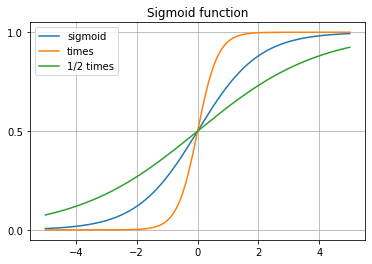

In [7]:
xs = np.linspace(-5,5,1001)
ys = sigmoid(xs)
y3 = sigmoid(xs, a=3)
y_half = sigmoid(xs, a=0.5)
plt.plot(xs, ys, label='sigmoid') 
plt.plot(xs, y3, label='times') 
plt.plot(xs, y_half, label='1/2 times')
plt.title("Sigmoid function")
plt.yticks([0,0.5,1])
plt.grid()
plt.legend()
plt.show()

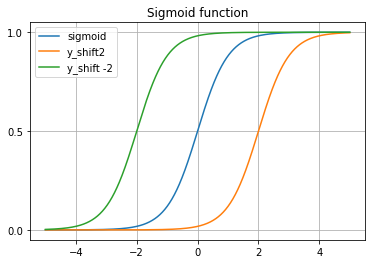

In [13]:
xs = np.linspace(-5,5,1001)
ys = sigmoid(xs, a=2)
y_shift2 = sigmoid(xs, a=2, b=2)
y_minus2 = sigmoid(xs, a=2, b=-2)
plt.plot(xs, ys, label='sigmoid') 
plt.plot(xs, y_shift2, label='y_shift2') 
plt.plot(xs, y_minus2, label='y_shift -2') 
plt.title("Sigmoid function")
plt.yticks([0,0.5,1])
plt.grid()
plt.legend()
plt.show()

- 이진 분류

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [11]:
# 로지스틱 회귀를 사용하려면 정규화가 필요
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [12]:
# Train/Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, random_state=2021
)

In [13]:
# Logistic 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=2021)
lr.fit(X_train, y_train)

LogisticRegression(random_state=2021)

In [14]:
lr.coef_

array([[-0.38562354, -0.34262207, -0.36413343, -0.41168842, -0.125392  ,
         0.53427855, -0.57868168, -0.85019026,  0.08724313,  0.2574702 ,
        -1.06464785,  0.20019118, -0.74749809, -0.84878727, -0.27163866,
         0.58431601,  0.06165371, -0.36110527,  0.42706156,  0.66294691,
        -1.01272202, -1.1987033 , -0.86629684, -0.96940075, -0.66452609,
         0.00882768, -0.84903123, -0.74604926, -0.72522438, -0.52639092]])

In [15]:
lr.intercept_

array([0.29535933])

In [16]:
X_test[0]

array([ 1.74177621,  0.8704049 ,  1.66535961,  1.73237389, -0.39712318,
        0.51091323,  0.72443042,  0.9778719 ,  1.03460934, -0.89416933,
        1.27198647,  0.53005435,  0.83558235,  1.04580552, -0.34167349,
        0.52211232,  0.34570453,  0.1449932 ,  0.72982504,  0.23303919,
        1.64647389,  0.96285899,  1.45470423,  1.52835897, -0.58602424,
        0.63381753,  0.66019449,  0.65008095,  1.27520633, -0.01473048])

- predict_proba() method를 이용하여 X_test[0]의 예측값 구하기

In [17]:
lr.predict_proba(X_test[0].reshape(1,-1))

array([[9.99994552e-01, 5.44815673e-06]])

- 직접 계산 : X_test[0]가 1이 될 확률을 계산

In [22]:
val = np.dot(lr.coef_, X_test[0]) + lr.intercept_ # y = wx+b
val

array([-12.12022777])

In [23]:
sigmoid(val)

array([5.44815673e-06])